## **Conclusion**

1. The p-value is larger than the chosen significance level(5%), there is not a statistically significant difference in the average number of drives between who use iPhone and drives who use Androids.
2. It is essential to explore other factors influence the variation in the number of drives, and run additional test to learn more about user behavior.

In [1]:
# Import packages for manipulation
import pandas as pd
import numpy as np

# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import package for statistical analysis
from scipy import stats


In [2]:
# Load dataset into dataframe
df = pd.read_csv("waze_dataset.csv")

In [3]:
# 1. Create `map_dictionary`
map_dictionary = {"Android" : 2, "iPhone" : 1}

# 2. Create new `device_type` column
df["device_type"] = df["device"]

# 3. Map the new column to the dictionary
df["device_type"] = df["device_type"].map(map_dictionary)
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,2
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,2
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,2


In [4]:
df.groupby("device_type").mean(numeric_only = True)


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
device_type,,,,,,,,,,,
1,7462.785153,81.378929,67.859078,191.145304,1740.824028,121.889061,29.670182,4037.927030,1856.242335,15.474979,12.159222
2,7564.753708,79.280833,66.231838,187.820417,1766.203679,121.091984,29.676741,4041.908059,1869.570741,15.649897,12.217383


In [5]:
# 1. Isolate the `drives` column for iPhone users.
iPhone = df[df['device_type'] == 1]['drives']

# 2. Isolate the `drives` column for Android users.
Android = df[df['device_type'] == 2]['drives']

# 3. Perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.463523206885235, pvalue=0.14335197268020597, df=11345.066049381952)

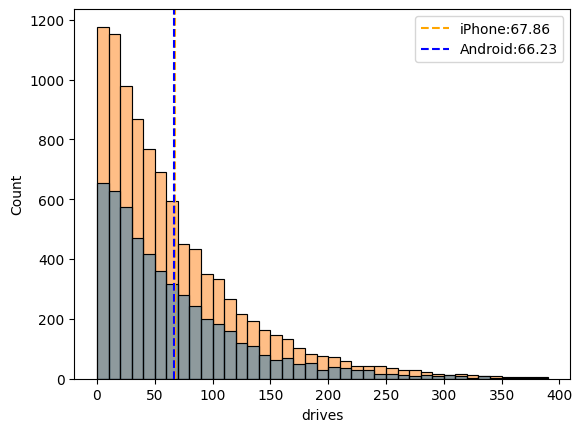

In [6]:
sns.histplot(data = df, x = "drives", hue = "device", bins = np.arange(0, 400, 10))
plt.axvline(x = 67.859, color = "orange", linestyle = "--", label = "iPhone:67.86")
plt.axvline(x = 66.23, color = "blue", linestyle = "--", label = "Android:66.23")
plt.legend()